# Lab 5 - Principal Component Analysis 

## Due: September 29, 2021 at 11:59 PM 

**Logistics and Lab Submission**

See the course website. This is the last lab for this section of the course. Make sure to be up to date for the policies of the second part of the course. **You will have another lab next week and a different TA (who is not familiar with this lab), so it is in your best interests to finish this lab before next week's lab session.**

The submission procedure is provided below:
- You will be provided with a template Python script (main.py) for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. **Do not change the file name or the function headers!**
- Upload only your Python script (.py file) on Gradescope. Don't upload your datasets or Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on Gradescope. The grading for the programming questions is automated using Gradescope autograder, no partial credits are given. Therefore, if you wish, you will have a chance to re-submit your code **within 72 hours** of receiving your first grade for this lab, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).
- If you re-submit, the final grade for the programming part of this lab will be calculated as .4 \* first_grade + .6 \* .9 \* re-submission_grade.
- This lab also has Multiple Choice Questions (MCQs) that are needed to be completed on Gradescope **within the deadline**.

There are some problems which have short answer questions. They are not graded, but we are free to discuss answers to these problems. **Multiple Choice Questions (MCQs) will be graded on Gradescope!**

Remember in many applications, the end goal is not always "run a classifier", like in a homework problem, but is to use the output of the classifier in the context of the problem at hand (e.g. detecting spam, identifying cancer, etc.). Because of this, some of our Engineering Design-type questions are designed to get you to think about the entire design problem at a high level.

### What You Will Need To Know For This Lab:

- Eigendecomposition
- Singular Value Decomposition
- Principal Component Analysis

### Preamble (Don't change this):

In [1]:
%pylab inline
# %matplotlib inline
%matplotlib notebook
import numpy as np
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run main.py
q1 = Question1()
q2 = Question2()
q3 = Question3()


### Enable Interactive Plots

In [3]:
# Probably already included in magic matplotlib notebook
# from IPython.display import display
# from ipywidgets import interact

### Problem 1: Visualizing Principal Components (40 points)

In this problem, you will be implementing PCA, visualizing the principal components and using it to perform dimensionality reduction. 

Do not use a pre-written implementation of PCA for this problem (e.g. sklearn.decomposition.PCA). You should assume that the input data has been appropriately pre-processed to have zero-mean features.

In [4]:
# We will generate some data.
numpy.random.seed(seed=2232017)
true_cov = np.array([[1,.5,.2],[.5,1,.3],[.2,.3,1]])
data=np.random.randn(1000,3).dot(np.linalg.cholesky(true_cov).T) 
print(data.shape)

(1000, 3)


First, we visualize the data using a 3D scatterplot. 

Our data is stored in a variable called `data` where each row is a feature vector (with three features).

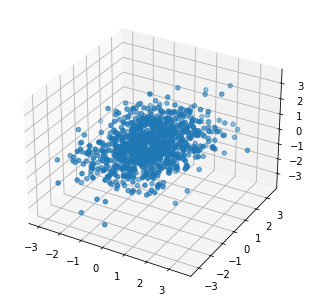

In [5]:
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(data[:,0],data[:,1],data[:,2])
# @interact(elev=(-90, 90), azim=(0, 360))
# def view(elev, azim):
#     ax.view_init(elev, azim)
#     display(ax.figure)

For all parts below, you can check out algorithm 9 on textbook pages 82-83.

**Part 1:** Write function `pca` which implements PCA. You can implement this via either the eigendecomposition of the SVD. <b>(20 points)</b>

You will be given as input:
- A $(N,d)$ numpy array of data (with each row as a feature vector)

Your function should return a tuple consisting of the PCA transformation matrix (which is $(d,d)$), and a vector consisting of the amount of variance explained in the data by each PCA feature. Note that each **row** of the $(d,d)$ matrix should contain a principal component. Also note that the PCA features are ordered in **decreasing** amount of variance explained, by convention and as you need to pass the autograder.

Hints:
- If you use eigen-decomposition, the function <a href="http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.eigh.html">numpy.linalg.eigh</a> will be useful. Note that it returns its eigenvalues (and corresponding eigenvectors) in **ascending** order. `numpy.fliplr` or similar may be useful as well. Besides, the easiest way to flip a numpy vector x is by x\[::-1\].
- You can calculate the covariance matrix of the data by multiplying the data matrix with its transpose in the appropriate order, and scaling it. 
- If you use SVD, the function <a href="http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.svd.html">numpy.linalg.svd</a> will be useful. Use the full SVD (default). Be careful with how the SVD is returned in `numpy.linalg.svd` (`V` in numpy is the transpose of what is in the notes). 
- Do NOT use `numpy.cov`-- we are assuming the data has zero mean beforehand, so the number of degrees of freedom is different (since the covariance estimate knows the mean in our case). 

The following code will run PCA on your data, store your PCA transformation in a variable called `W`, and the amount of variance explained by each PCA feature in a variable called `s`, and print out the principal components (i.e. the rows of `W`) along with the corresponding amount of variance explained. 

In [6]:
q1 = Question1()
W,s = q1.pca(data)

# This will print out the principal components & the amount of variance they explain
for i in range(W.shape[1]):
    print(i+1,end='')
    print('-th principal component: ', W[i,:], "\t Variance:",s[i])

1-th principal component:  [-0.58522166 -0.68258448 -0.43771457] 	 Variance: 1.642585468740696
2-th principal component:  [-0.43983688 -0.18627811  0.87854652] 	 Variance: 0.8165897938602763
3-th principal component:  [-0.68121886  0.70666746 -0.19121184] 	 Variance: 0.48669754113470864


You should see your explained variance decreasing above.

We can visualize the principal components on top of our data. The first principal component is in red, and captures the most variance. The second principal component is in green, while the last principal component is in yellow.

We generated our data from am *elliptical distribution*, so it should be easy to visualize these components as the axes of the data (which looks like an ellipsoid).

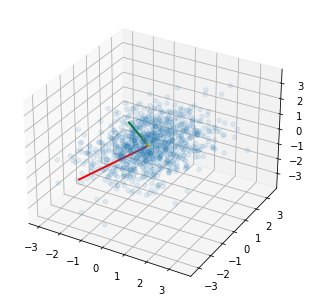

In [7]:
figb = plt.figure()
axb = Axes3D(figb,auto_add_to_figure=False)
figb.add_axes(axb)
axb.scatter(data[:,0],data[:,1],data[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axb.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)
# @interact(elev=(-90, 90), azim=(0, 360))
# def view(elev, azim):
#     axb.view_init(elev, azim)
#     display(axb.figure)

If done correctly, the red line should be longer than the green line which should be longer than the yellow line.

Now, you will implement functions to generate PCA features.

**Part 2:** Write function `pcadimreduce` which implements dimension reduction via PCA. It takes in three inputs:
- A $(N,d)$ numpy array, `data`, with each row as a feature vector
- A $(d,d)$ numpy array, `W`, the PCA transformation matrix (e.g. generated from `pca`)
- A number `k` ($\leq d$), which is the number of PCA features to retain

It should return a $(N,k)$ numpy array, where the $i$-th row contains the PCA features corresponding to the $i$-th input feature vector. <b>(10 points)</b>

**Part 3:** Write function `pcareconstruct` which reconstructs the original features from the PCA features. It takes in two inputs:
- A $(N,k)$ numpy array, `pcadata`, with each row as a PCA feature vector (e.g. generated from `pcadimreduce`)
- A $(d,d)$ numpy array, `W`, the PCA transformation matrix (e.g. generated from `pca`)

It should return a $(N,d)$ numpy array, where the $i$-th row contains the reconstruction of the original $i$-th input feature vector (in `data`) based on the PCA features contained in `pcadata`. <b>(10 points)</b>

In [8]:
q1 = Question1()
# Reconstructed data using all the principal components
reduced_data=q1.pcadimreduce(data,W,3)
reconstructed_data=q1.pcareconstruct(reduced_data,W)

print ("This should be small:",np.max(np.abs(data-reconstructed_data)))

This should be small: 4.440892098500626e-15


As a sanity check, if you take $k=3$, perform dimensionality reduction then reconstruction, you should get the original data back:

One use of PCA is to help visualize data. The 3-D plots above are a bit hard to read on a 2-D computer screen or when printed out. 

The following code uses PCA to to reduce the data to $k$ dimensions, and constructs an approximation of the original features using the first $k$ principal components. 

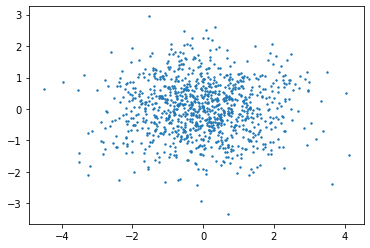

In [9]:
reduced_data = q1.pcadimreduce(data,W,2)
scatter(reduced_data[:,0],reduced_data[:,1],s=2)
reconstructed_data = q1.pcareconstruct(reduced_data,W)

We can now visualize the data using two principal components in the original feature space.

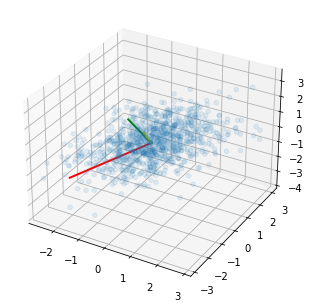

In [10]:
figc = plt.figure()
axc = Axes3D(figc,auto_add_to_figure=False)
figc.add_axes(axc)
axc.scatter(reconstructed_data[:,0],reconstructed_data[:,1],reconstructed_data[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axc.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)    
# @interact(elev=(-90, 90), azim=(0, 360))
# def view(elev, azim):
#     axc.view_init(elev, azim)
#     display(axc.figure)

If done correctly, you should see no component of the data along the third principal direction, and the data should lie in a plane.

The following code uses PCA to reduce the data to one dimension and store the one dimensional PCA feature in `reduced_data_1` and constructs an approximation of the original features using the first  principal component.

In [11]:
reduced_data_1 = q1.pcadimreduce(data,W,1)
reconstructed_data_1 = q1.pcareconstruct(reduced_data_1,W)

We can now visualize this in the original feature space. 

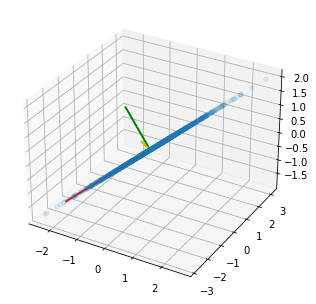

In [12]:
figd = plt.figure()
axd = Axes3D(figd,auto_add_to_figure=False)
figd.add_axes(axd)
axd.scatter(reconstructed_data_1[:,0],reconstructed_data_1[:,1],reconstructed_data_1[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axd.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)
    
# @interact(elev=(-90, 90), azim=(0, 360))
# def view(elev, azim):
#     axd.view_init(elev, azim)
#     display(axd.figure)

If done correctly, you should see no component of the data along the second and third principal direction, and the data should lie along a line. This may be easier with the Interactive Mode on. 

We can also visualize the PCA feature as a histogram:

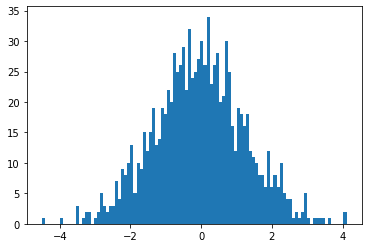

In [13]:
figure()
n, bins, patches = hist(reduced_data_1,100)

### Problem 2: PCA for Data Compression (20 points)

In class, you saw an example application of PCA to create eigenfaces. In this part of the lab, we will look at eigenfaces for compression using the <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html">Olivetti faces dataset</a>. 

In [14]:
from sklearn.datasets import get_data_home
print(get_data_home())
# If you get an error below, you need to delete olivetti_py3.pkz in this folder.

/home/lspss95207/scikit_learn_data


In [15]:
# First, we load the Olivetti dataset
from sklearn.datasets import fetch_olivetti_faces

oli = fetch_olivetti_faces()
# If you get an error here, please delete ~/scikit_learn_data/olivetti_py3.pkz (if on Mac by default, otherwise call get_data_home() to get the default package location)
# For details, see https://github.com/scikit-learn/scikit-learn/issues/19376#issuecomment-777636008
    
# Height and Width of Images are in h,w. You will need to reshape them to this size display them.
h = 64
w = 64
X = oli.data

X_t = X[20]
X = X[:-1]

# This centering is unnecessary. It just makes the pictures a bit more readable. 
X_m = np.mean(X,axis=0)
X = X - X_m # center them
X_t = X_t - X_m

The whole data set is in `X`. You will compress a specific image `X_t`. 

We can visualize the Olivetti Faces:
<img src="olivettifaces.gif"></img>

We will be making use of Scikit-Learn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a> functionality. 

In particular, three functions will be useful for this problem :
- `PCA.fit` : Finds the requested number of principal components.
- `PCA.transform` : Apply dimensionality reduction (returns the PCA features)
- `PCA.inverse_transform` : Go from PCA features to the original features (Useful for visualizing)

You will also find the following useful:
- `PCA.explained_variance_ratio_` : Fraction of variance explained by each of the principal components

**Part 1:** Write function `unexp_var` that will fit a PCA on X, and return the fraction of **unexplained** variance on `X` by PCA retaining the first $i$ principal components, for $i=1,\ldots,k$. You will also return the pca object that has been fit on the image X.

The following code uses this function to plot the fraction of unexplained variance. Your result should be a scree plot (normalized by the total variance). 

Hint: `numpy.cumsum` may be useful for this. <b>(10 points)</b>

Text(0, 0.5, 'Fraction of unexplained variance')

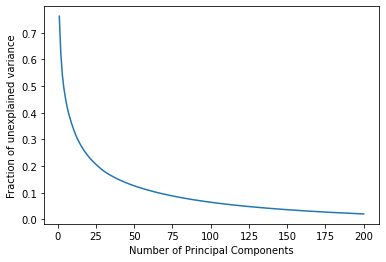

In [16]:
pca, unexpv = q2.unexp_var(X,200)

figure()
plot(np.arange(1,201),unexpv)
xlabel('Number of Principal Components')
ylabel('Fraction of unexplained variance')

The following code visualizes the first 5 principal components as well as the 30th, 50th and 100th principal components, which are called **eigenfaces** in this context. Our PCA object is called `pca`, and the eigenfaces are contained in `pca.components_`, where each row is a principal component. 

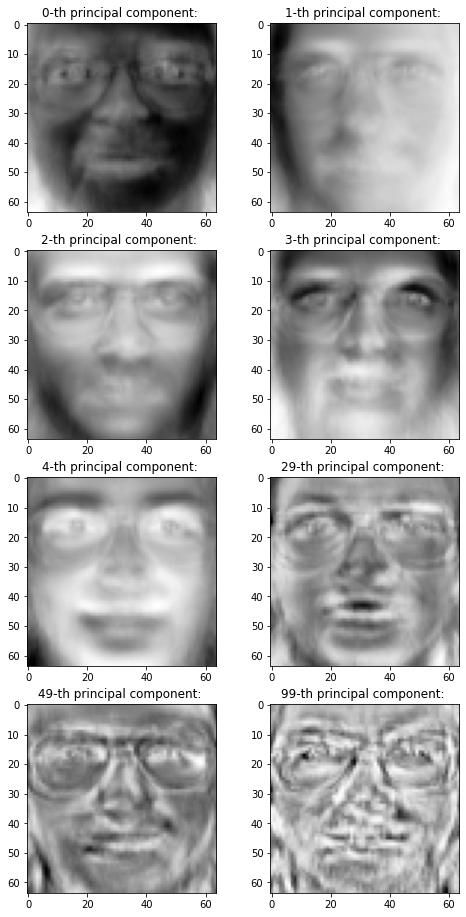

In [17]:
fn=np.asarray([0,1,2,3,4,29,49,99])

figure(figsize=(8,16))
for i in range(fn.size):
    subplot(4,2,i+1)
    title("{}-th principal component: ".format(fn[i]))
    imshow((pca.components_[fn[i]]).reshape((h,w)),cmap=cm.Greys_r)

Later eigenfaces capture more detail as compared to earlier ones (e.g. they're specific to some guy). 

Now, you will compress an image, `X_t`, using PCA. 

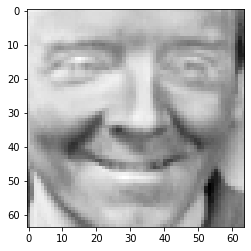

In [18]:
# This is what X_t looks like:
figure()
imshow((X_t).reshape((h,w)),cmap=cm.Greys_r)

**Part 2:** Write function `pca_approx` that will take as input the `pca` object fit on `X` and returned in the previous part, the input `X_t`, and `i`, and returns an approximation of `X_t` using the the first `i`  principal components (learned from `X`).

You can employ the following procedure:
 
1. Transform `X_t` to the PCA features determined by `X`.
2. Retain the first `i` PCA features of the transformed `X_t` (by setting the rest to zero). 
3. Transform the result from step 2 back to the original feature space. 

Hint: You would want to reshape your `X_t` when using `pca.transform` and `pca.inverse_transform` to (1,-1) since it is a single image.

The following code displays the image in `X_t`'s approximation using the first `i` principal components (learned from `X`)  where i=1,10,20,...,100 (i.e. in increments of 10), then 120,140,160,180,200 (i.e. in increments of 20).


<b>(10 points)</b>

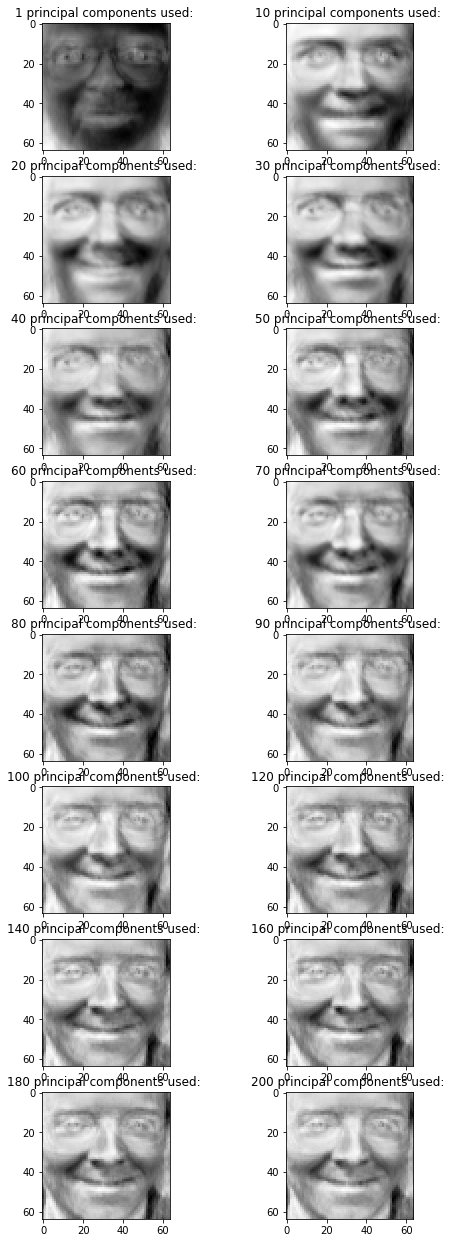

In [19]:
sizes=np.array([1] + [i for i in range(10,101,10)] + [i for i in range(120,201,20)])
figure(figsize=(8,22))
for i in range(sizes.size):
    recon_img=q2.pca_approx(X_t, pca, sizes[i])
    subplot(8,2,i+1)
    title("{} principal components used: ".format(sizes[i]))
    imshow((recon_img).reshape((h,w)),cmap=cm.Greys_r)
    

### Problem 3: PCA for Classification (20 points)

First, we will load a data set of digits drawn from zip codes written on US mail. This data set was designed to help get good algorithms to sort mail by zip code automatically. It has been preprocessed a bit, with details given <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt">here</a>. Each feature vector consists of real values representing grayscale values of a 16 by 16 image of a digit. The training data has 7291 samples, while the validation data has 2007 samples. Note that this is not the same dataset built into scikit- learn -- it is much larger.

Use `sklearn.decomposition.PCA` for this problem. 

In [20]:
#Loading the Data
#Read in the Training Data
traindata_tmp= np.genfromtxt('zip.train', delimiter=' ')
#The training labels are stored in "trainlabels", training features in "traindata"
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]
#Read in the Validation Data
valdata_tmp= np.genfromtxt('zip.val', delimiter=' ')
#The validation labels are stored in "vallabels", validation features in "valdata"
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]

Recall that in Lab 2, you found that the validation error on this data set was 0.056 for 1-NN. 

Write function `pca_classify` that returns the validation errors using 1-NN on the PCA features using 1,2,...,k PCA features, the minimum validation error, and number of PCA features used. <b>(20 points)</b>

Hint:
- While returning the number of features, remember that the number of features starts from 1 and not from 0 (i.e., be careful while using the array indexing).
- This function should take some time.

In [21]:
ve, min_ve, pca_feat = q3.pca_classify(traindata, trainlabels, valdata, vallabels, 256)

The following code will plot the validation error vs the number of features.

Minimum Validation error:  0.04932735426008968
Number of PCA features to retain: 39


(-11.75, 268.75, 0.019681116093672145, 0.671898355754858)

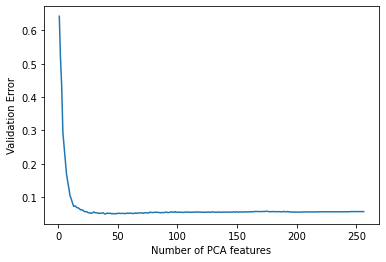

In [22]:
figure()
plot(np.arange(1,256+1),ve)
xlabel('Number of PCA features')
ylabel('Validation Error')
print ("Minimum Validation error: ",min_ve)
print ("Number of PCA features to retain:",pca_feat)
axis("tight")

### Problem 4 (For your own understanding): Spectral Clustering 

<b> Problem 4 is optional and for your own understanding. It will not be graded by the autograder, and will not count towards your score for this lab.</b>

In this problem, you will implement a powerful clustering algorithm known as spectral clustering. It can separate data that in some cases, K-means cannot (as you will see in this problem).

Spectral clustering works by forming a graph based on similarities between data vectors, and looking for cluster of data vectors such that the similarity between them is high, but the similarity to vectors outisde the clusters is low (and the clusters aren't too small).

See Section 4.3 in the notes for details on how it works, or [this tutorial](https://arxiv.org/abs/0711.0189). 

**The Spectral Clustering Algorithm (Alg. 9):**


1. Let $\tilde{L} = I - D^{-1/2} S D^{-1/2}$ where $D^{-1/2}$ is a square diagonal matrix with $\frac{1}{\sqrt{d_i}}$ as the $i$-th entry on the diagonal (where $\mathbf{d} = S \mathbf{1}$). 
2. Take the eigen-decomposition of $\tilde{L}= U \Lambda U^\top$ where $\Lambda$ is a diagonal matrix containing the eigenvalues of $L$.
3. Let $U_K$ be a matrix whose columns are the eigenvectors corresponding to the $K$-smallest eigenvalues of $L$.
4. Normalize each row of $U_K$ (i.e. divide each entry on the $i$-th row by the norm of the $i$-th row)
5. Apply K-means clustering to the rows of $U_K$ (i.e. treat each row of $U_K$ as a $K$-dimensional feature vector and cluster it). 
6. Return the cluster labels from step $4$. $\mathbf{x}_i$ is assigned to the cluster which the $i$-th row of $U_K$ was assigned to. 

$L$ is known as the normalized Laplacian of the similarity graph, and has many nice properties for analyzing the similarity graph, most of which are beyond the scope of the course. 

Note: You don't really need to know why spectral clustering works to do this problem (though it would be nice) -- you just need to be able to implement the algorithm.

First, I'll make a data set based on the Illinois logo.

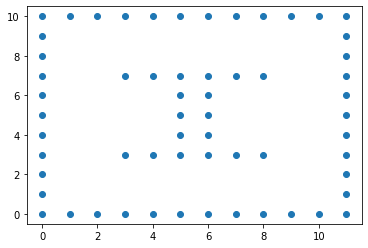

In [23]:
tmp=np.nonzero(np.asarray(
[[1,1,1,1,1,1,1,1,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,1],
[1,0,0,0,0,0,0,0,0,0,0,1],
[1,0,0,1,1,1,1,1,1,0,0,1],
[1,0,0,0,0,1,1,0,0,0,0,1],
[1,0,0,0,0,1,1,0,0,0,0,1],
[1,0,0,0,0,1,1,0,0,0,0,1],
[1,0,0,1,1,1,1,1,1,0,0,1],
[1,0,0,0,0,0,0,0,0,0,0,1],
[1,0,0,0,0,0,0,0,0,0,0,1],
[1,1,1,1,1,1,1,1,1,1,1,1]]))

illcmap=ListedColormap(['#131F33','#FA6300'])

data=np.c_[tmp[1],tmp[0]]
figure()
scatter(data[:,0],data[:,1])

Let us first see what happens if we try to cluster these points using K-means to get 2 clusters:

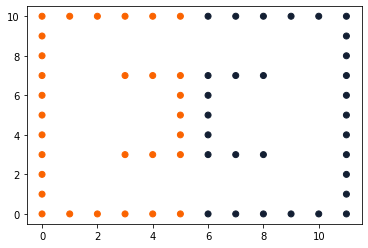

In [24]:
kmf=KMeans(init='k-means++',n_clusters=2)
kmf.fit(data)
figure()
scatter(data[:,0],data[:,1],c=kmf.labels_,cmap=illcmap)

You should see something like the right half of the points are in one cluster, and the left half are in the other. The Illinois I should not be separated from the perimeter. In general, **K-means cannot produce non-convex clusters** (i.e. if you draw a line between any 2 points in a cluster, any point that lies on that line is in that cluster), so it cannot separate the I from the border.

Now, implement spectral clustering as described above. 

Recall that `numpy.linalg.eigh` returns the eigenvalues of a matrix in *ascending* order.

The code provided already calculates $L$. 

In [25]:
def spectralClustering(data,K,C=1):
    W=np.exp(-dist.cdist(data,data,'sqeuclidean')/C)
    W=W-np.diag(np.diag(W))
    Dinv5=np.diag( (W.dot(np.ones(W.shape[0])))**(-0.5) )
    L=np.eye(W.shape[0])-Dinv5.dot(W).dot(Dinv5)
    # Put your code below
    
    return None

Now, run your spectral clustering implementation with 2 clusters on the data in `data`, and plot the data with the colors given by the clusters returned by `spectralClustering` with `cmap=illcmap`. 

In [26]:
figure()
color = spectralClustering(data,2)
if color:
    scatter(data[:,0],data[:,1],c=color,cmap=illcmap)

<Figure size 432x288 with 0 Axes>

The default value of $C=1$ in the spectral clustering code should separate the I from the border (though which will be colored orange and which will be blue will be random).

# And this concludes the Machine Learning section of the course! Good luck with your future endeavors!